## Breaking y axis plot


Sometimes in a barplot a single bar can dominate the scale. This produces the other bars appear almost the same relative to each other. To avoid this, we can break the scale of the Y axis.



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

XX = pd.Series([200,400,100,8000],index=['x1','x2','x3','x4'])

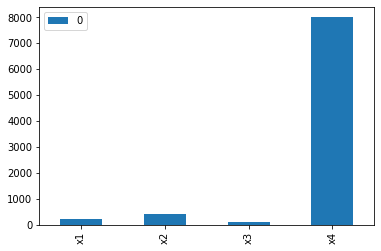

In [33]:
pd.DataFrame(XX).plot(kind="bar")

Notice that the plot from above is had to grasp:

is the third bar half the height of the first one? do they have very similar height?

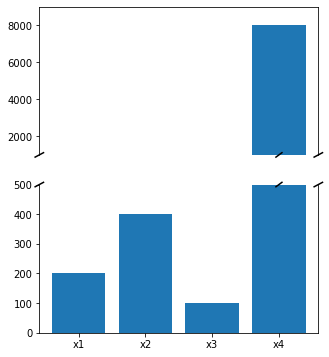

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#XX = pd.Series([200,400,100,1400],index=['x1','x2','x3','x4'])
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,
                         figsize=(5,6))

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 500
ts = 1000

ax2.set_ylim(0,bs)
ax1.set_ylim(ts,XX.max()+1000)
#ax1.set_yticks(np.arange(1000,XX.max()+1,100))

bars1 = ax1.bar(XX.index, XX.values)
bars2 = ax2.bar(XX.index, XX.values)

for tick in ax2.get_xticklabels():
    tick.set_rotation(0)

d = .015  

kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+3*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+3*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())
plt.show()